In [1]:
import CNN2Head_input
import tensorflow as tf
import numpy as np
import BKNetStyle
from const import *
import cv2

from IPython.display import Image, display

In [2]:
sess = tf.InteractiveSession()
x = tf.placeholder(tf.float32, [None, 48, 48, 1])

y_smile_conv, y_gender_conv, y_age_conv, phase_train, keep_prob = BKNetStyle.BKNetModel(x)

In [9]:
PATH = 'genki4k/files/file0480.jpg'
img = cv2.imread(PATH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(48, 48))

img = (img - 128) / 255.0
T = np.zeros([48, 48, 1])
T[:, :, 0] = img
test_img = []
test_img.append(T)
test_img = np.asarray(test_img)

print('Restore model')
saver = tf.train.Saver()
saver.restore(sess, SAVE_FOLDER2 + 'model-age101.ckpt.meta')
print('OK')

display(Image(filename = PATH, width=100, height=100))

predict_y_smile_conv = sess.run(y_smile_conv, feed_dict={x: test_img, phase_train: False, keep_prob: 1})
predict_y_gender_conv = sess.run(y_gender_conv, feed_dict={x: test_img, phase_train: False, keep_prob: 1})
predict_y_age_conv = sess.run(y_age_conv, feed_dict={x: test_img, phase_train: False, keep_prob: 1})

smile_label = "No " if np.argmax(predict_y_smile_conv)==0 else "Yes "
gender_label = "Female " if np.argmax(predict_y_gender_conv)==0 else "Male "
argmax_predict_age = np.argmax(predict_y_age_conv)
if argmax_predict_age==0:
    age_label = "Young (age < 30yrs) "
elif argmax_predict_age==1:
    age_label = "Middle (30 <= age <45) "
elif argmax_predict_age==2:
    age_label = "Old (45 <= age < 60) "
else :
    age_label = "Very Old (60 <= age) "

print('Smile: ' + smile_label + str(predict_y_smile_conv))
print('Gender: ' + gender_label + str(predict_y_gender_conv))
print('Age: ' + age_label + str(predict_y_age_conv))

Restore model
INFO:tensorflow:Restoring parameters from ./save/current2/model-age101.ckpt.meta


DataLossError: Unable to open table file ./save/current2/model-age101.ckpt.meta: Data loss: not an sstable (bad magic number): perhaps your file is in a different file format and you need to use a different restore operator?
	 [[node save_3/RestoreV2 (defined at <ipython-input-9-c1c514e33bcc>:14)  = RestoreV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, ..., DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save_3/Const_0_0, save_3/RestoreV2/tensor_names, save_3/RestoreV2/shape_and_slices)]]

Caused by op 'save_3/RestoreV2', defined at:
  File "/Users/jamaalhay/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/jamaalhay/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/jamaalhay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/jamaalhay/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/jamaalhay/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Users/jamaalhay/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/jamaalhay/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/jamaalhay/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/jamaalhay/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/jamaalhay/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/jamaalhay/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/jamaalhay/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/jamaalhay/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/jamaalhay/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/jamaalhay/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/jamaalhay/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/jamaalhay/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/jamaalhay/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/jamaalhay/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/jamaalhay/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-c1c514e33bcc>", line 14, in <module>
    saver = tf.train.Saver()
  File "/Users/jamaalhay/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1102, in __init__
    self.build()
  File "/Users/jamaalhay/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1114, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "/Users/jamaalhay/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1151, in _build
    build_save=build_save, build_restore=build_restore)
  File "/Users/jamaalhay/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 795, in _build_internal
    restore_sequentially, reshape)
  File "/Users/jamaalhay/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 406, in _AddRestoreOps
    restore_sequentially)
  File "/Users/jamaalhay/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 862, in bulk_restore
    return io_ops.restore_v2(filename_tensor, names, slices, dtypes)
  File "/Users/jamaalhay/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_io_ops.py", line 1466, in restore_v2
    shape_and_slices=shape_and_slices, dtypes=dtypes, name=name)
  File "/Users/jamaalhay/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/jamaalhay/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/Users/jamaalhay/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3274, in create_op
    op_def=op_def)
  File "/Users/jamaalhay/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

DataLossError (see above for traceback): Unable to open table file ./save/current2/model-age101.ckpt.meta: Data loss: not an sstable (bad magic number): perhaps your file is in a different file format and you need to use a different restore operator?
	 [[node save_3/RestoreV2 (defined at <ipython-input-9-c1c514e33bcc>:14)  = RestoreV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, ..., DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save_3/Const_0_0, save_3/RestoreV2/tensor_names, save_3/RestoreV2/shape_and_slices)]]


Restore model
INFO:tensorflow:Restoring parameters from ./save/current/model.ckpt
OK


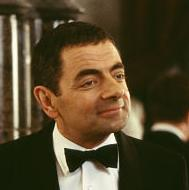

Smile: Yes [[ 0.00149914  0.99850082]]
Gender: Male [[ 0.24222387  0.75777608]]
Age: Middle (30 <= age <45) [[ 0.11998766  0.42773849  0.35627618  0.09599768]]


In [7]:
PATH = '/home/ubuntu/coding/cnn/datasets/imdb_crop/00/nm0000100_rm3653409024_1955-1-6_2003.jpg'
img = cv2.imread(PATH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(48, 48))

img = (img - 128) / 255.0
T = np.zeros([48, 48, 1])
T[:, :, 0] = img
test_img = []
test_img.append(T)
test_img = np.asarray(test_img)

print('Restore model')
saver = tf.train.Saver()
saver.restore(sess, SAVE_FOLDER + 'model.ckpt')
print('OK')

display(Image(filename = PATH, width=100, height=100))

predict_y_smile_conv = sess.run(y_smile_conv, feed_dict={x: test_img, phase_train: False, keep_prob: 1})
predict_y_gender_conv = sess.run(y_gender_conv, feed_dict={x: test_img, phase_train: False, keep_prob: 1})
predict_y_age_conv = sess.run(y_age_conv, feed_dict={x: test_img, phase_train: False, keep_prob: 1})

smile_label = "No " if np.argmax(predict_y_smile_conv)==0 else "Yes "
gender_label = "Female " if np.argmax(predict_y_gender_conv)==0 else "Male "
argmax_predict_age = np.argmax(predict_y_age_conv)
if argmax_predict_age==0:
    age_label = "Young (age < 30yrs) "
elif argmax_predict_age==1:
    age_label = "Middle (30 <= age <45) "
elif argmax_predict_age==2:
    age_label = "Old (45 <= age < 60) "
else :
    age_label = "Very Old (60 <= age) "

print('Smile: ' + smile_label + str(predict_y_smile_conv))
print('Gender: ' + gender_label + str(predict_y_gender_conv))
print('Age: ' + age_label + str(predict_y_age_conv))